In [2]:
import  csv

class Item:
    pay_rate = 0.8  
    all = []
    def __init__(self, name:str,price:float,quantity:int): 
        # run validation 
        assert price >=0,f"price `{price}` is not grater than zero!"
        assert quantity >=0 ,f"quantity `{quantity}` is not grater than zero!"
        #assign to self object 
        self.name = name
        self.price =price
        self.quantity = quantity
        
        # Action to exectue
        Item.all.append(self)  

    def calcilate_total_price(self):
        return self.price * self.quantity

    
    def apply_discount(self,):
        self.price =self.price * self.pay_rate     
        return self.price 

    @classmethod   
    def instantiate_from_csv(cls):
        with open('items.csv','r') as f:
            reader =  csv.DictReader(f) # this will read the csv as list of dictionary
            items = list(reader)   # converting reader into list


        for item in items:
            Item(
                name = item.get('name'),
                price = float(item.get('price')),
                quantity=  int(item.get('quantity')),
            )

    @staticmethod           # this means that this static method never sending in background the instance as first argument 
    def is_interger(num):   # stand alone or isolated function
        # we wll count out the float that are point zero

        #for i.e: 5.0, 10.0
        if isinstance(num, float):

            # count out the float that are point zero
            return num.is_integer()
        elif isinstance(num,int):
            return True
        else : 
            return False

    def __repr__(self) -> str:
        return f"Item({self.name!r},{self.price!r},{self.quantity!r})"

In [44]:
# lets say we have multiple phones like

# we have created instance for phones
phone1 = Item("ab1",500,60)  
phone1.broken_phone = 1    # we can't sell this broken phone 
phone2 = Item("ab2",100,20)
phone1.broken_phone = 1 # we can't sell this broken phone 
 


# so we need to calulate these number of brken  phones and for that we need to create a method for that, but we can't create this method inside the item class as it will not be use full for other items 
# we need to create a seprate  class that will inherit the functionality of the Item class 


In [45]:
class Phone (Item):
    pass




phone1 = Item("ab1",500,60)  
phone1.broken_phone = 1    
phone2 = Item("ab2",100,20)
phone1.broken_phone = 1 

phone1 = Phone("ab1",500,60)  
phone1.broken_phone = 1    
phone2 = Phone("ab2",100,20)
phone1.broken_phone = 1 


# both works 

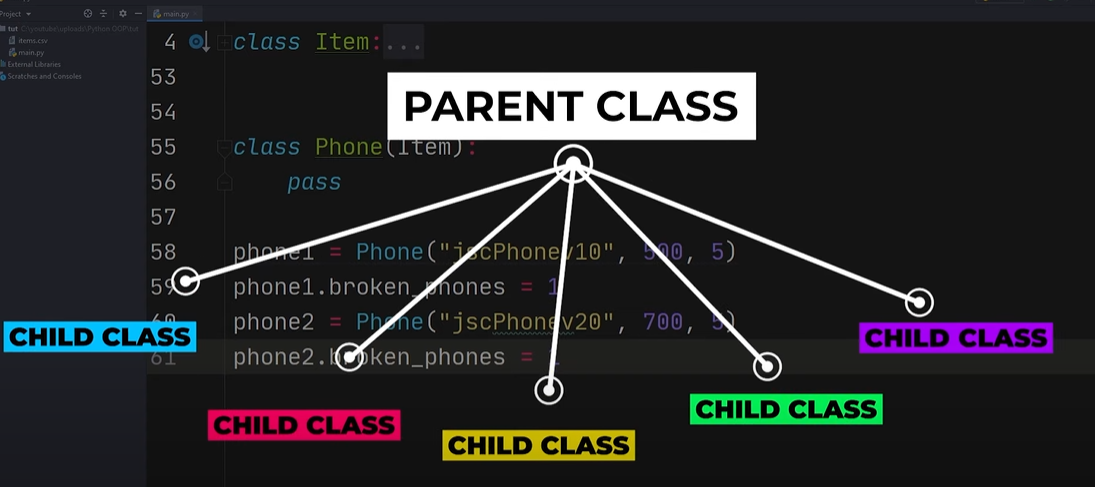

In [46]:
class Phone (Item):
    all = [ ]
    def __init__(self, name:str,price:float,quantity:int, broken_phone = 0 ): 

        # run validation 
        assert price >=0,f"price `{price}` is not grater than zero!"
        assert quantity >=0 ,f"quantity `{quantity}` is not grater than zero!"
        assert broken_phone >=0 ,f"broken phone `{broken_phone}` is not grater than zero!"
        #assign to self object 
        self.name = name
        self.price =price
        self.quantity = quantity
        self.broken_phone = broken_phone

        #action to execute
        Phone.all.append(self)

phone1 = Phone("ab1",500,60)  
print(phone1.calcilate_total_price())


# super
# super allows us to have full acess to all the attributes of the parent class 
# and by using the super function we don't need to hard  code the attribute assignment like we are doing 
#         self.name = name
#         self.price =price
#         self.quantity = quantity
#         self.broken_phone = broken_phone


# becuse will crete a  loat of duplication of code 


30000


In [3]:
class Phone (Item):
    all = [ ]
    def __init__(self, name:str,price:float,quantity:int, broken_phone = 0 ): 
      
        assert broken_phone >=0 ,f"broken phone `{broken_phone}` is not grater than zero!"

        #assign to slef object 
        self.broken_phone = broken_phone

phone1 = Phone("ab1",500,60)  
print(phone1.calcilate_total_price())


AttributeError: 'Phone' object has no attribute 'price'

In [9]:
# this errror is comming  from the Item class becuse it think that it hase the attribute of item class  but we never have the price attribute in the phone level
# to solve this 



class Phone (Item):
    all = [ ]
    def __init__(self, name:str,price:float,quantity:int, broken_phone = 0 ): 
        # call to super function to have acess to all attributes/ method
        super().__init__(name,price,quantity)
        assert broken_phone >=0 ,f"broken phone `{broken_phone}` is not grater than zero!"

        #assign to slef object 
        self.broken_phone = broken_phone
        #action to execute
        Phone.all.append(self)

phone1 = Phone("ab1",500,60)  
print(phone1.calcilate_total_price())


30000


In [10]:
class Phone (Item):
    all = []
    def __init__(self, *args, broken_phone = 0, **kwargs ): 
        # call to super function to have acess to all attributes/ method
        super().__init__(*args,**kwargs)
        assert broken_phone >=0 ,f"broken phone `{broken_phone}` is not grater than zero!"

        #assign to slef object 
        self.broken_phone = broken_phone
        #action to execute
        Phone.all.append(self)

phone1 = Phone("ab1",500,60)  
print(phone1.calcilate_total_price())



30000


In [11]:
print(Phone.all)



[Item('ab1',500,60)]


In [ ]:
# but why it is giving [Item('ab1',500,60)]

In [17]:
# To fix this we need to change  the __repr__ method that we wrote in Item class 


import  csv

class Item:
    pay_rate = 0.8  
    all = []
    def __init__(self, name:str,price:float,quantity:int): 
        # run validation 
        assert price >=0,f"price `{price}` is not grater than zero!"
        assert quantity >=0 ,f"quantity `{quantity}` is not grater than zero!"
        #assign to self object 
        self.name = name
        self.price =price
        self.quantity = quantity
        
        # Action to exectue
        Item.all.append(self)  

    def calcilate_total_price(self):
        return self.price * self.quantity

    
    def apply_discount(self,):
        self.price =self.price * self.pay_rate     
        return self.price 

    @classmethod   
    def instantiate_from_csv(cls):
        with open('items.csv','r') as f:
            reader =  csv.DictReader(f) # this will read the csv as list of dictionary
            items = list(reader)   # converting reader into list


        for item in items:
            Item(
                name = item.get('name'),
                price = float(item.get('price')),
                quantity=  int(item.get('quantity')),
            )

    @staticmethod           # this means that this static method never sending in background the instance as first argument 
    def is_interger(num):   # stand alone or isolated function
        # we wll count out the float that are point zero

        #for i.e: 5.0, 10.0
        if isinstance(num, float):

            # count out the float that are point zero
            return num.is_integer()
        elif isinstance(num,int):
            return True
        else : 
            return False

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}({self.name!r},{self.price!r},{self.quantity!r})"
    
class Phone (Item):
    # all = [ ]   as we have written super so we also have the acess to the class attributes also 
    def __init__(self, name:str,price:float,quantity:int, broken_phone = 0 ): 
        # call to super function to have acess to all attributes/ method
        super().__init__(name,price,quantity)
        assert broken_phone >=0 ,f"broken phone `{broken_phone}` is not grater than zero!"

        #assign to slef object 
        self.broken_phone = broken_phone


        # #action to execute          # removeing  this also 
        
        # Phone.all.append(self)

phone1 = Phone("ab1",500,60)  
# print(phone1.calcilate_total_price())

print(Item.all)
print(Phone.all)

[Phone('ab1',500,60)]
[Phone('ab1',500,60)]


In [ ]:
# Now as the code is growing so we will sprate the code and place them in seprate files 